# Aula 01 - Árvores

Na aula de hoje, exploraremos um pouco das **árvores de decisão**. Esses modelos são simples e altamente interpretáveis, porém carecem de capacidade de predição.

------------

# 1. Teoria e contextualização

[Material disponível na apresentação.](intro.pdf)

------------

# 2. Primeiro contato

A biblioteca do [scikit-learn](https://scikit-learn.org/stable/) será a nossa principal fonte para os algoritmos que iremos trabalhar nas próximas semanas.

#### Modelo

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [1]:
from sklearn.tree import DecisionTreeClassifier

#### Plot tree

[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [2]:
from sklearn.tree import plot_tree

#### Dataset

[breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
dataset = load_breast_cancer(as_frame=True)

In [41]:
x = dataset.data
y = dataset.target

x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [94]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [42]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

-------

# 3. A mão na massa!

#### Separação em treino e teste

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [95]:
modelo = DecisionTreeClassifier(random_state=12)

modelo

DecisionTreeClassifier(random_state=12)

In [96]:
# Treino do modelo

modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [97]:
y_train_pred = modelo.predict(X_train)

y_test_pred = modelo.predict(X_test)

print(y_train_pred.shape, y_test_pred.shape)

(398,) (171,)


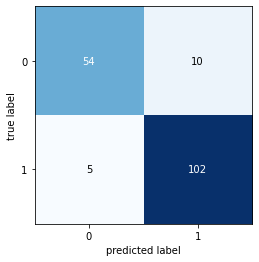

In [98]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

#### Overfitting

Modelo com bom desempenho em treino, mas baixo desempenho em teste!

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Treino:
Acc: 1.00, Precision: 1.00, Recall: 1.00
Teste:
Acc: 0.91, Precision: 0.91, Recall: 0.95


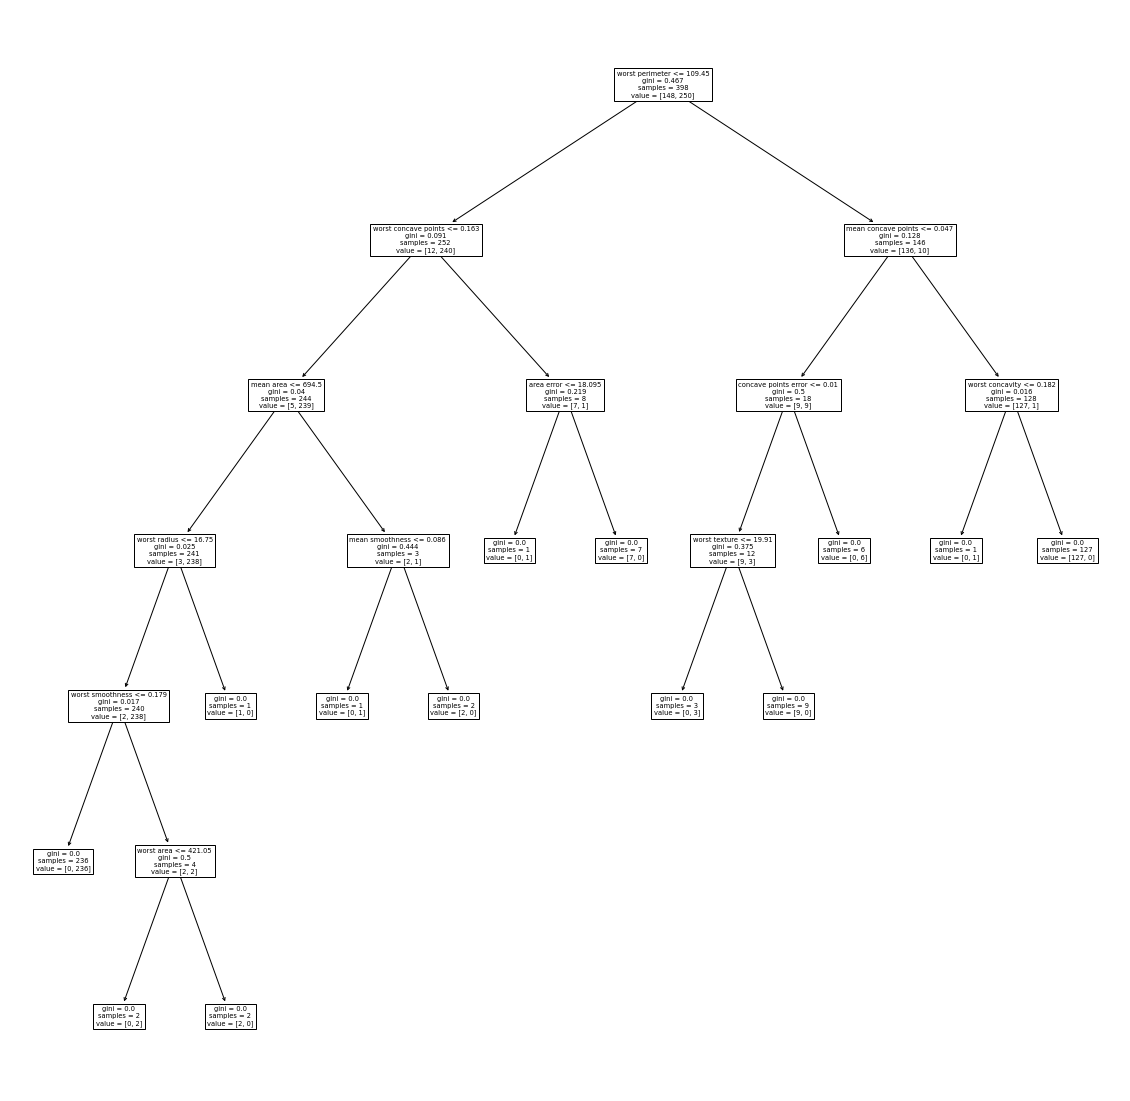

In [100]:
plt.figure(figsize=(20, 20))
plot_tree(modelo, feature_names=X_train.columns)
plt.show()

---------

# 4. Para anotar

- Árvores de decisão são algoritmos simples e interpretáveis, porém possuem desempenho limitado;

- O argoritmo pode ser utilizado tanto para classificação, quanto para regressão;

- Árvores exigem pouco pré-processamento dos dados para serem utilizadas;

- É possível adaptar uma árvore para uma sequência lógica de if-else.

--------

# Referências

An Introduction to Statistical Learning, 2013, Gareth James. Daniela Witten. Trevor Hastie. Robert Tibshirani.